In [2]:
from u_shaped_lib import CSH, OSA, beatnote_drift as bd, HighFinesse_FN as HF #Modified data is used, so we load CSH and not CSH_unmodified (where division with prop factor is needed)
import matplotlib.pyplot as plt
import numpy as np
import tabulate
import sys
import os
import pandas as pd

In [3]:
path_0_um = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Weird_data\New_lensed_fiber\Coupling_distance\0_dist"
path_2_um = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Weird_data\New_lensed_fiber\Coupling_distance\2_dist"
path_4_um = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Weird_data\New_lensed_fiber\Coupling_distance\4_dist"
path_6_um = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Weird_data\New_lensed_fiber\Coupling_distance\6_dist"
path_8_um = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Weird_data\New_lensed_fiber\Coupling_distance\8_dist"
path_10_um = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Weird_data\New_lensed_fiber\Coupling_distance\10_dist"
path_15_um = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Weird_data\New_lensed_fiber\Coupling_distance\15_dist"
path_20_um = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Weird_data\New_lensed_fiber\Coupling_distance\20_dist"
path_25_um = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Weird_data\New_lensed_fiber\Coupling_distance\25_dist"
path_30_um = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Weird_data\New_lensed_fiber\Coupling_distance\30_dist"
path_35_um = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Weird_data\New_lensed_fiber\Coupling_distance\35_dist"
path_40_um = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Weird_data\New_lensed_fiber\Coupling_distance\40_dist"

paths = [path_0_um,path_2_um,path_4_um,path_6_um,path_8_um,path_10_um,path_15_um,path_20_um,path_25_um,path_30_um,path_35_um,path_40_um]

names = ["0 um","2 um","4 um","6 um","8 um","10 um","15 um","20 um","25 um","30 um","35 um","40 um"]
distances=[0,2,4,6,8,10,15,20,25,30,35,40]

OSA_data=[]
CSH_data=[]
HF_data=[]
power_data = []

for path in paths:
    
    CSH_data.append(CSH.get_data(path+'\\200_counts'))

    data = OSA.process_and_plot_osa_data(path+'\\OSA',plot=False,save_plots=False)
    OSA_data.append([[d[2]['# Center wavelength'] for d in data], [d[0] for d in data],[d[1] for d in data]])

    HF_data.append(HF.get_data(path+'\\HighFinesse'))

    df = pd.read_csv(path+'\\200_counts\power.txt', delimiter=' ', skiprows=1, names=['time', 'power'])
    df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d_%H-%M-%S-%f')
    df['delta_time'] = (df['time'] - df['time'].iloc[0]).dt.total_seconds()
    power_data.append(df[['delta_time', 'power']].values)



<>:33: SyntaxWarning: invalid escape sequence '\p'
<>:33: SyntaxWarning: invalid escape sequence '\p'
C:\Users\au617810\AppData\Local\Temp\ipykernel_2852\2294237131.py:33: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv(path+'\\200_counts\power.txt', delimiter=' ', skiprows=1, names=['time', 'power'])
c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\u_shaped_lib\OSA.py:67: RuntimeWarning: invalid value encountered in log10
  power = 10*np.log10(power)
c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\u_shaped_lib\OSA.py:67: RuntimeWarning: invalid value encountered in log10
  power = 10*np.log10(power)
c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\u_shaped_lib\OSA.py:67: RuntimeWarning: invalid value encountered in log10
  power = 10*np.log10(power)
c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\u_shaped_lib\OSA.py:67: RuntimeWarning: invalid value encountered in log10
  power = 10*np.log10(power)
c:\Users\au617810\.conda\envs\cond

+--------+----------------+---------------+------------------+---------------------+
| Type   | CSH LW [kHz]   | HF LW [kHz]   | OSA WL [nm]      | Power (300s) [mW]   |
+========+================+===============+==================+=====================+
| 0 um   | 8.6 ± 3.1      | 11.8 ± 3.9    | 1549.057 ± 0.001 | 23.2 ± 0.1          |
+--------+----------------+---------------+------------------+---------------------+
| 2 um   | 5.6 ± 2.5      | 7.3 ± 3.2     | 1549.054 ± 0.002 | 21.3 ± 0.1          |
+--------+----------------+---------------+------------------+---------------------+
| 4 um   | 7.2 ± 1.9      | 12.4 ± 3.9    | 1549.053 ± 0.001 | 17.1 ± 0.1          |
+--------+----------------+---------------+------------------+---------------------+
| 6 um   | 11.8 ± 2.3     | 16.0 ± 4.8    | 1549.056 ± 0.001 | 13.1 ± 0.2          |
+--------+----------------+---------------+------------------+---------------------+
| 8 um   | 19.5 ± 5.3     | 30.9 ± 11.8   | 1549.058 ± 0.001 | 9.

Text(0.5, 1.0, 'Linewidth vs coupling distance')

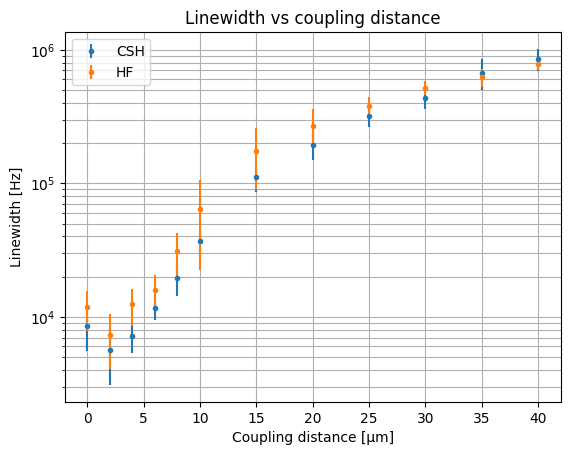

In [4]:
stat_CSH = []
stat_OSA = []
stat_HF = []
stat_data = []

for i,name in enumerate(names):
    csh_avg = np.average(CSH_data[i][0])*1e-3
    csh_std = np.std(CSH_data[i][0])*1e-3

    hf_avg = np.average(HF_data[i][0])*1e-3 
    hf_std = np.std(HF_data[i][0])*1e-3
    
    osa_avg = np.average(OSA_data[i][0])
    osa_std = np.std(OSA_data[i][0])


    power = power_data[i][:,1]*20*1e3 #mW. Times 20, as there is a 90/10 and a 50/50 splitter before the PM.
    power_avg = np.average(power)
    power_std = np.std(power)
    
    stat_CSH.append(['CSH LW, '+name, csh_avg, csh_std])
    stat_HF.append(['HF LW, '+name, hf_avg, hf_std])
    stat_OSA.append(['OSA WL, '+name, osa_avg, osa_std])


    
    stat_data.append([
        name,
        f"{csh_avg:.1f} ± {csh_std:.1f}",
        f"{hf_avg:.1f} ± {hf_std:.1f}", 
        f"{osa_avg:.3f} ± {osa_std:.3f}",
        f"{power_avg:.1f} ± {power_std:.1f}"
    ])


table = tabulate.tabulate(stat_data,headers=['Type','CSH LW [kHz]','HF LW [kHz]','OSA WL [nm]', 'Power (300s) [mW]'],tablefmt='grid')
print(table)

plt.figure()

plt.errorbar(distances,[lw[1]*1e3 for lw in stat_CSH],yerr=[lw[2]*1e3 for lw in stat_CSH],fmt='.',label='CSH')
plt.errorbar(distances,[lw[1]*1e3 for lw in stat_HF],yerr=[lw[2]*1e3 for lw in stat_HF],fmt='.',label='HF')

plt.yscale('log')
plt.grid(True,which='both')
plt.legend()
plt.xlabel('Coupling distance [m]')
plt.ylabel('Linewidth [Hz]')
plt.title('Linewidth vs coupling distance')

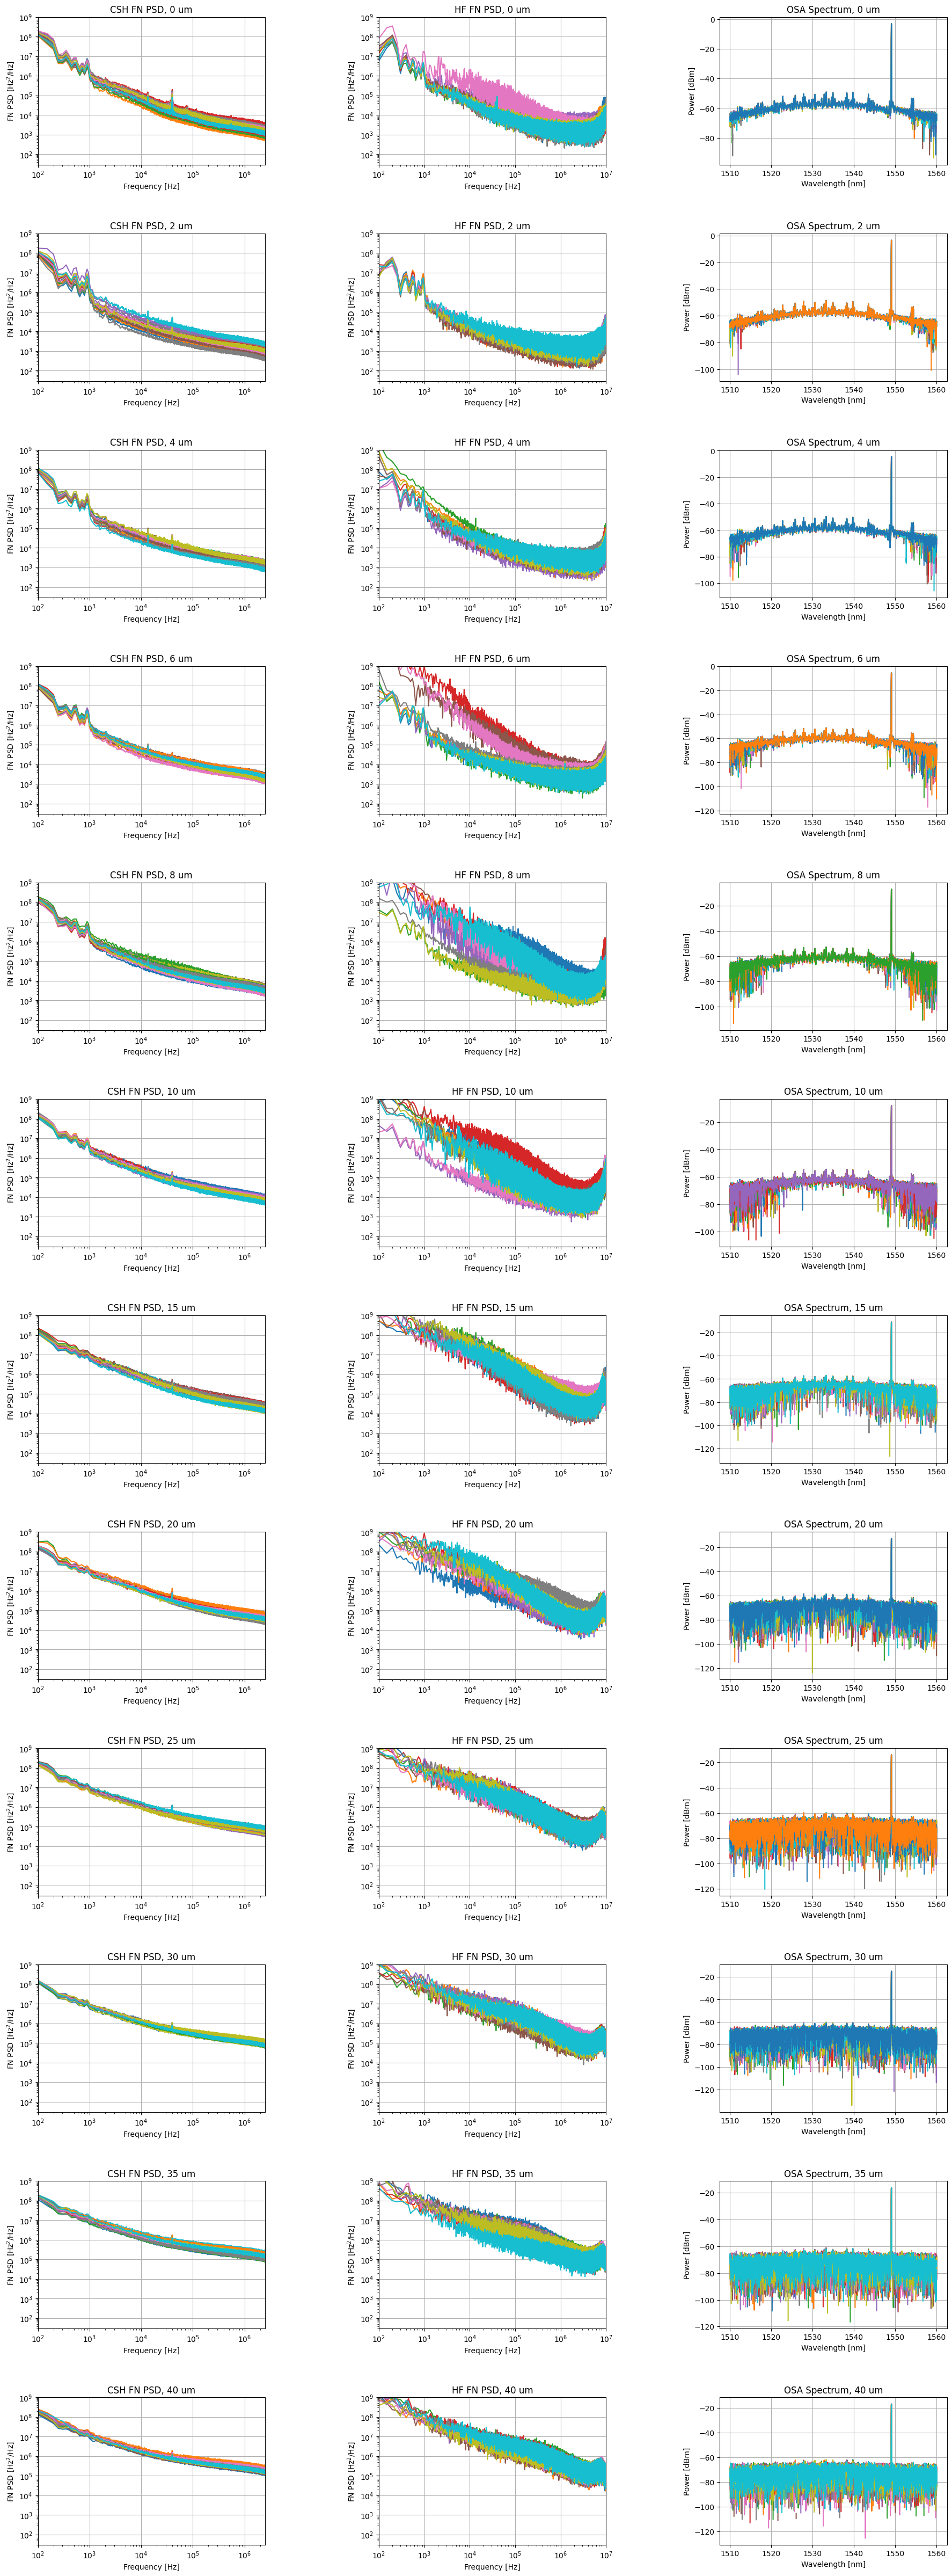

In [5]:
no_FN_data = len(names)

fig = plt.figure(figsize=(18, 4*no_FN_data))
subfigs = fig.subfigures(no_FN_data, 3, height_ratios=[1]*no_FN_data, hspace=0.1)

for j, name in enumerate(names):
    # CSH plot
    ax_csh = subfigs[j, 0].add_subplot(111)
    for i in range(len(CSH_data[j][1])):
        ax_csh.plot(CSH_data[j][1][i], CSH_data[j][2][i], label=f'{i}')
    ax_csh.set_title('CSH FN PSD, ' + name)
    ax_csh.set_yscale('log')
    ax_csh.set_xscale('log')
    ax_csh.set_xlim([1e2, 2.5e6])
    ax_csh.set_ylim([3e1, 1e9])
    ax_csh.set_xlabel('Frequency [Hz]')
    ax_csh.set_ylabel('FN PSD [Hz$^2$/Hz]')
    ax_csh.grid(True, which='major')
    subfigs[j, 0].subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.9)

    # HF plot  
    ax_hf = subfigs[j, 1].add_subplot(111)
    for i in range(len(HF_data[j][1])):
        ax_hf.plot(HF_data[j][1][i], HF_data[j][2][i], label=f'{i}')
    ax_hf.set_title('HF FN PSD, ' + name)
    ax_hf.set_yscale('log')
    ax_hf.set_xscale('log') 
    ax_hf.set_xlim([1e2, 1e7])
    ax_hf.set_ylim([3e1, 1e9])
    ax_hf.set_xlabel('Frequency [Hz]')
    ax_hf.set_ylabel('FN PSD [Hz$^2$/Hz]')
    ax_hf.grid(True, which='major')
    subfigs[j, 1].subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.9)

    # OSA plot
    ax_osa = subfigs[j, 2].add_subplot(111)
    for i in range(len(OSA_data[j][1])):
        ax_osa.plot(OSA_data[j][1][i], OSA_data[j][2][i], label=f'{i}')
    ax_osa.set_title('OSA Spectrum, ' + name)
    ax_osa.set_xlabel('Wavelength [nm]')
    ax_osa.set_ylabel('Power [dBm]')
    ax_osa.grid(True, which='major')
    subfigs[j, 2].subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.9)
